In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy


In [2]:
# data augmentation to create more varied data
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# loiading traning file and pre processing it 
train_generator = datagen.flow_from_directory(
    'train',  
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle= True
)

Found 70295 images belonging to 38 classes.


In [3]:


# ImageDataGenerator for validation data - no augmentation, just rescaling
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Assuming your validation data is stored in a directory structure similar to training data
validation_generator = validation_datagen.flow_from_directory(
    'valid',  # Directory with validation data
    target_size=(224, 224),  # Ensure this matches the input size used during training
    batch_size=16,  # Can be a different batch size than training
    class_mode='categorical',  # Ensure this matches the training setup
    shuffle=False  # No need to shuffle validation data
)


Found 17572 images belonging to 38 classes.


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [5]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
#importing pre trained model 

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()
model.add(base_model)
model.add(Conv2D(filters = 768,kernel_size = 4, activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size= 2, strides=2)) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 38, activation = 'softmax'))
#adding custom layers to train on specific problem 

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 768)         25166592  
                                                                 
 dropout (Dropout)           (None, 4, 4, 768)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 768)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 768)         0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                        

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)

training_history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping], batch_size=64)
# training model 

Epoch 1/100
4394/4394 [==============================] - 774s 157ms/step - loss: 1.2909 - accuracy: 0.6613 - val_loss: 0.6771 - val_accuracy: 0.7997
Epoch 2/100
4394/4394 [==============================] - 435s 99ms/step - loss: 0.7828 - accuracy: 0.7822 - val_loss: 0.5747 - val_accuracy: 0.8342
Epoch 3/100
4394/4394 [==============================] - 436s 99ms/step - loss: 0.7003 - accuracy: 0.8127 - val_loss: 0.4308 - val_accuracy: 0.8758
Epoch 4/100
4394/4394 [==============================] - 443s 101ms/step - loss: 0.6434 - accuracy: 0.8321 - val_loss: 0.4380 - val_accuracy: 0.8728
Epoch 5/100
4394/4394 [==============================] - 442s 101ms/step - loss: 0.5964 - accuracy: 0.8442 - val_loss: 0.3716 - val_accuracy: 0.8969
Epoch 6/100
4394/4394 [==============================] - 440s 100ms/step - loss: 0.5840 - accuracy: 0.8533 - val_loss: 0.4017 - val_accuracy: 0.8835
Epoch 7/100
4394/4394 [==============================] - 439s 100ms/step - loss: 0.5677 - accuracy: 0.8583 -

Evaluate on test data
1099/1099 [==============================] - 45s 40ms/step - loss: 0.3555 - accuracy: 0.8945
test loss, test accuracy: [0.3555010259151459, 0.8944912552833557]


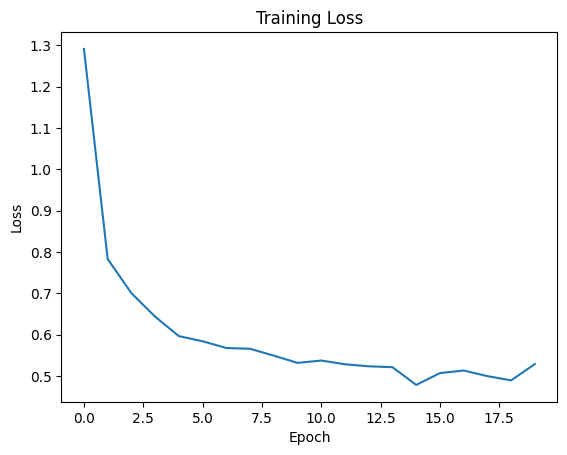

In [12]:
import matplotlib.pyplot as plt
print("Evaluate on test data")
results = model.evaluate(validation_generator, batch_size=32)
print("test loss, test accuracy:", results)

plt.plot(training_history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [2]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Assuming your validation data is stored in a directory structure similar to training data
test_generator = test_datagen.flow_from_directory(
    'test',  # Directory with validation data
    target_size=(224, 224),  # Ensure this matches the input size used during training
    batch_size=16,  # Can be a different batch size than training
    class_mode='categorical',  # Ensure this matches the training setup
    shuffle=False  # No need to shuffle validation data
)
results = model.evaluate(test_generator, batch_size=32)
print("test loss, test accuracy:", results)

plt.plot(training_history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

NameError: name 'ImageDataGenerator' is not defined

In [15]:
model.save("trained_model_v2.h5")

In [1]:
model.save_weights('model_weights.h5')

NameError: name 'model' is not defined